# This notebook compares results of a spreadsheet emailed by Blanchard to PySulfSat

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

In [2]:
df=ss.import_data('Blanchard_Emailed_spreadsheet2.xlsx',
                 sheet_name='Test_1_Comp')

We have replaced all missing liquid oxides and strings with zeros. 


In [3]:
Calc_Blan=ss.calculate_B2021_SCSS(df=df, T_K=df['T_K'],
                                P_kbar=df['P_GPa']*10,
                                Fe_FeNiCu_Sulf=1)

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


Text(0, 0.5, 'Calc in pySulfSat (ppm)')

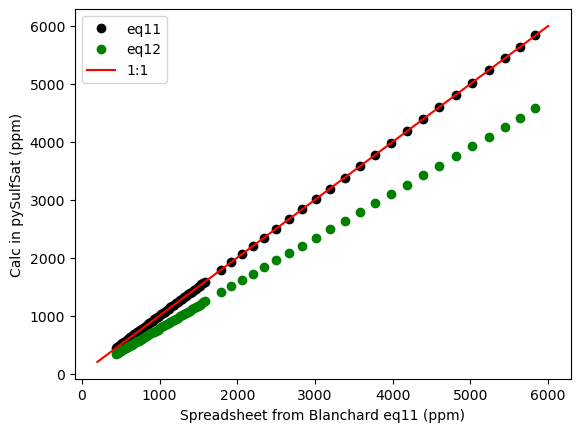

In [4]:
plt.plot(df['SCSS_eq11_Bl'],
         Calc_Blan['SCSS2_ppm_eq11'],
         'ok', label='eq11')

plt.plot(df['SCSS_eq11_Bl'],
         Calc_Blan['SCSS2_ppm_eq12'],
         'og', label='eq12')

plt.plot([200, 6000], [200, 6000], '-r', label='1:1')
plt.legend()
plt.xlabel('Spreadsheet from Blanchard eq11 (ppm)')
plt.ylabel('Calc in pySulfSat (ppm)')

## Show it also works using calculated sulfide compositions

In [9]:
Calc_Blan_calc_sulf=ss.calculate_B2021_SCSS(df=df, T_K=df['T_K'],
                                P_kbar=df['P_GPa']*10,
                                Ni_Liq=500, Cu_Liq=100,
                                Fe_FeNiCu_Sulf='Calc_ONeill')
Calc_Blan_calc_sulf.head()

Calc_Blan_calc_sulf2=ss.calculate_B2021_SCSS(df=df, T_K=df['T_K'],
                                P_kbar=df['P_GPa']*10,
                                Ni_Liq=500, Cu_Liq=100,
                                Fe_FeNiCu_Sulf='Calc_Smythe')
Calc_Blan_calc_sulf2

Calc_Blan_calc_sulf3=ss.calculate_B2021_SCSS(df=df, T_K=df['T_K'],
                                P_kbar=df['P_GPa']*10,
                                Ni_Sulf=10, Cu_Sulf=20, Fe_Sulf=40)
Calc_Blan_calc_sulf3.head()

Using inputted Sulf compositions to calculate Fe_FeNiCu_Sulf ratios.


SCSS_eq11    SCSS_eq12  SiO2_Liq  TiO2_Liq  Al2O3_Liq  FeOt_Liq  MnO_Liq  \
0  3479.685612  2729.635921      45.8      0.21       4.53      8.17     0.14   
1  3363.329048  2633.723319      45.8      0.21       4.53      8.17     0.14   
2  3242.993454  2535.759861      45.8      0.21       4.53      8.17     0.14   
3  3119.829483  2436.490812      45.8      0.21       4.53      8.17     0.14   
4  2994.842069  2336.566354      45.8      0.21       4.53      8.17     0.14   

   MgO_Liq  CaO_Liq  Na2O_Liq  K2O_Liq  P2O5_Liq  H2O_Liq  Fe3Fet_Liq  \
0    37.09     3.68       0.0      0.0       0.0     0.01         0.0   
1    37.09     3.68       0.0      0.0       0.0     0.01         0.0   
2    37.09     3.68       0.0      0.0       0.0     0.01         0.0   
3    37.09     3.68       0.0      0.0       0.0     0.01         0.0   
4    37.09     3.68       0.0      0.0       0.0     0.01         0.0   

   Ni_Liq_ppm  Cu_Liq_ppm  Unnamed: 0  Cr2O3_Liq  total  P_GPa        T_K  \
0         0.0         0.0         NaN       0.37  100.0      1  1927.7093   
1         0.0         0.0         NaN       0.37  100.0      2  1978.0544   
2         0.0         0.0         NaN       0.37  100.0      3  2025.1511   
3         0.0         0.0         NaN       0.37  100.0      4  2069.1152   
4         0.0         0.0         NaN       0.37  100.0      5  2110.0625   

        LnS  SCSS_eq11_Bl  Fe_FeNiCu  Fe_FeNiCu_Sulf_calc  
0  8.671797   5835.975239          1             0.596203  
1  8.637786   5640.827141          1             0.596203  
2  8.601352   5439.005590          1             0.596203  
3  8.562633   5232.440411          1             0.596203  
4  8.521746   5022.817032          1             0.596203